<a href="https://colab.research.google.com/github/emmanuellaanggi/grad_assignments/blob/main/Simple%20Linear%20Regression%20and%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 1**

Emmanuella Anggi Siallagan (2106678006) & Rizki Triyani Pusparini (2106774963)

Group 7



In [ ]:
# Core libraries that will be used in each problems
import pandas as pd # open the dataset provided
import numpy as np # working with arrays, metrics, and math functions

# **Problem 1**

Linear Regression with Gradient Descent (Full Batch)

Data comprise of 2 columns: (xi, yi) with x,y 𝜖 ℝ. Furthermore, y is obtained from x through a polynomial function f : x → y (e.g. f(x) = w2x^2 + w1x + w0). Approximate the function f that maps x into y. Use the first
500 data for training and the last 50 data for testing the model.

Import data and essensial libraries

In [ ]:
# Download and open the dataset, in this working documents, all data stored in google drive
# and open for public to use

url='https://drive.google.com/file/d/1-qdoMX3FcQPUpZUr2-ojhDAZ4EsNP4P5/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]

# Read data with pandas
df_polynomial = pd.read_csv(url2)

# Quick Glimpse at the dataset
df_polynomial.head()

,Unnamed: 0,X,Y
0,0,-2.374744,-3.094894
1,1,2.547238,38.888090
2,2,-6.191231,-169.515397
3,3,4.014113,109.170321
4,4,-0.481199,3.530228


In [ ]:
# Defining columns for each variable that will be used on this Problem

X = df_polynomial["X"]
Y = df_polynomial["Y"]

## a.

Implement and run polynomial_basis_function(X) method with function
takes a matrix of data X={x1
, …, xm} as the parameter and returns ϕ(X), a certain polynomial form of X. Determine the degree of the polynomial.

In [ ]:
# Function of polynomial

def polynomial_basis_function(X, degree):

  # Return list of degree of power that will be used at the function, e.g degree of 3 will return list 3, 2, 1, 0
  degree_list = sorted([x for x in range(0,degree+1)], reverse=True) 

  # Empty list to contain PhiX
  PhiX = []

  # Return list of Phi X powering each X row with degree list
  for i in range(len(X)):
    PhiX.append([X[i]**j for j in degree_list])

  return PhiX

## b.

Implement the gradient_function(w, Phi_X, y)
method that takes weight w, transformed data ϕ(X), and the
ground-truth Y = {y1
, …, ym} (from the dataset) as the parameters. The output is the MSE gradient of the linear model, given ϕ(X), w, and Y

∇w MSE(ϕ(X), w, Y) = ϕ(X)T
(ϕ(X)w - Y)

In [ ]:
# Source: https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/tutorials/tut1.pdf

def gradient_function(w, Phi_X, Y):
  N, D = np.shape(PhiX) # take the shape of Phi X given by previous function
  y_pred = np.matmul(PhiX, w) # multiplying the metrics of Phi X and weight that will be passed by the input on the core function after this
  error = y_pred - Y # calculate error for passing new weight

  # return MSE gradient as stated by the problem: 2/total data * transpose of Phi X 
  # multiplied by the error (target prediction - actual target)
  return  np.matmul(np.transpose(PhiX), error) / float(N) * 2 

## c.

Implement and run the gradient_descent_function(PhiX, Y, w0) method. The parameter w0 refers to a starting value
of w, set to be a zero vector. Following the
example from a.) and b.), w0 = [0.0, 0.0, 0.0]. This method will update
the w0 for epoch times and will output w after finishing the update.

w^t+1 = w^t - 𝞰∇w MSE(ϕ(X), w, Y)

In [ ]:
# SOURCE: https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/tutorials/tut1.pdf

def gradient_descent_function(PhiX, Y, print_every=2500, epoch=100000, eta=0.005):
  N, D = np.shape(PhiX) # take the shape of Phi X given by polunomial function
  w = np.zeros([D]) # initialize starting weights by zeros with D length size as stated by the shape

  for k in range(epoch):
    dw = gradient_function(w, PhiX, Y) # apply the previous function in loop number of epoch to get the MSE of the updated weights
    w = w - eta*dw # update the weight with the learning rate and MSE passed by gradient function

    if k % print_every == 0:
      print('Weight after %d iteration: %s' % (k, str(w))) # print per 2500 iteration to get the update of the weight at certain epoch
  
  print('\nFinal weight ' + (str(w))) # Print the final weight
  return w

## d.

Use the w that obtained after running the gradient_descent_function on
the test dataset (the last 50). Then, compute the MSE between the predicted Y and the true Ytest.

In [ ]:
# Prediction function aa stated on polynomial f(x) = w2.x^2 + w1.x + 1.w0

def predict_poly(PhiX):

  # empty list to contain Y prediction
  y_prediction = [0]*len(PhiX)

  for i in range(len(PhiX)):
    y_prediction[i] = 0 # empty list to contain the row prediction
    for j in range(len(w)):
      temp_y = PhiX[i][j] * w[j] # list x that already powered by the degree list multiplied by weights achieved by gradient function
      y_prediction[i] += temp_y # stored in list y prediction

  return y_prediction

In [ ]:
# To visualize the comparison of prediction and actual y

from scipy.interpolate import make_interp_spline, BSpline # library to smooth the line of the linear model
import matplotlib.pyplot as plt # core library for visualization

def visualize_comp(X , y_prediction, Y): # create function so that we can reuse it for each of the model in the problem
  
  with plt.xkcd(): # to get interactive plot
    fig, ax = plt.subplots(1, 1, figsize=(20, 8)) # frame of the graph

    # plot the real data with smoothed line
    xnew = np.linspace(X.min(), X.max()) 
    spl = make_interp_spline(np.sort(X), np.sort(Y))
    power_smooth = spl(xnew)
    plt.plot(xnew, power_smooth, color='r', label='Real Data')
    plt.legend()

    # plot the predicted data with smoothed line
    xnew_pred = np.linspace(X.min(), X.max()) 
    spl_pred = make_interp_spline(np.sort(X), np.sort(y_prediction))
    power_smooth_pred = spl_pred(xnew_pred)
    plt.plot(xnew_pred, power_smooth_pred, color='g', label='Prediction')
    plt.legend()

    # show in 1 graph
    plt.show()

Weight after 0 iteration: [3.14040220e-01 6.97670737e-03 4.33939980e-03 1.29600139e-04]
Weight after 2500 iteration: [1.02661339 2.06790627 0.0714076  0.04339878]
Weight after 5000 iteration: [1.02590195 2.06769845 0.12330753 0.05322908]
Weight after 7500 iteration: [1.02520861 2.0674417  0.17386518 0.06300905]

Final weight [1.02453347 2.06718839 0.22309583 0.07273645]

MSE: 24.702422105740137



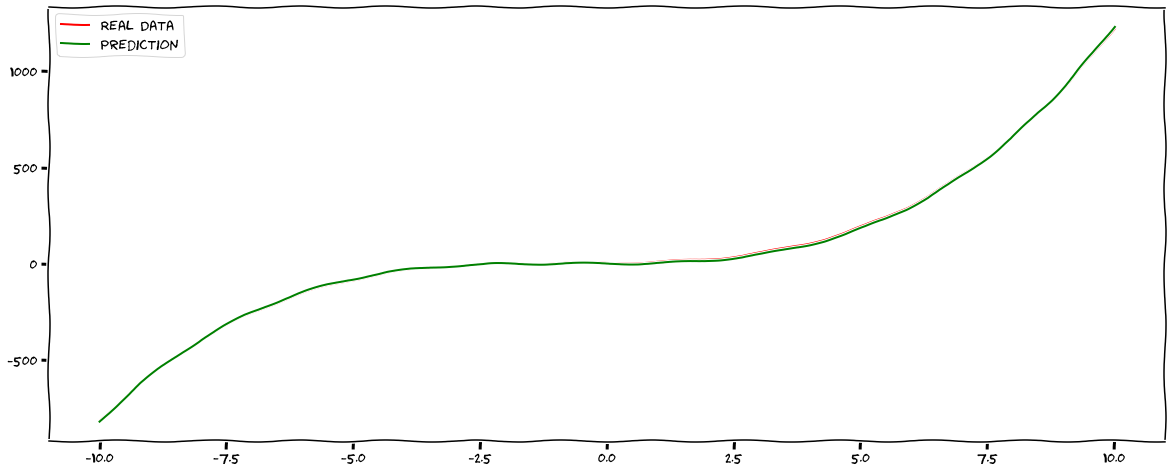

In [ ]:
# Train the X with degree of polynomial 3, degree of 3 used since the graph of the data is 
# very alike with the graph of acustomed graph polynomial with degree of 3

PhiX = polynomial_basis_function(X[:500], 3) # 500 data used as training
w = gradient_descent_function(PhiX, Y = Y[:500], epoch=10000, eta=0.000001) # eta is very small since we want to avoid the overflowing number

y_prediction = predict_poly(polynomial_basis_function(list(X[50:]), 3)) #predict our last data of 50

# Getting the MSE of the overal data to evaluate the model
MSE = np.square(np.subtract(Y[50:],y_prediction)).mean() # https://www.geeksforgeeks.org/python-mean-squared-error/
print("\nMSE: " + str(MSE) + "\n")

# At last visualize the data
visualize_comp(X[50:] , y_prediction, Y[50:])

As seen on the graph and the result of Mean Squared Error, this model fits perfectly to the actual target until the line of the real data is very much not visible. As comparison, we provide the visualization and MSE result from degree polynomial of 2 (baseline linear regression).

Weight after 0 iteration: [0.00697671 0.0043394  0.0001296 ]
Weight after 2500 iteration: [ 1.68071829 10.02949241  0.06415548]
Weight after 5000 iteration: [ 1.71180575 18.48466387  0.09262838]
Weight after 7500 iteration: [ 1.73802613 25.61138625  0.11344838]

Final weight [ 1.76017    31.61618051  0.12782092]

MSE: 59178.585111540044



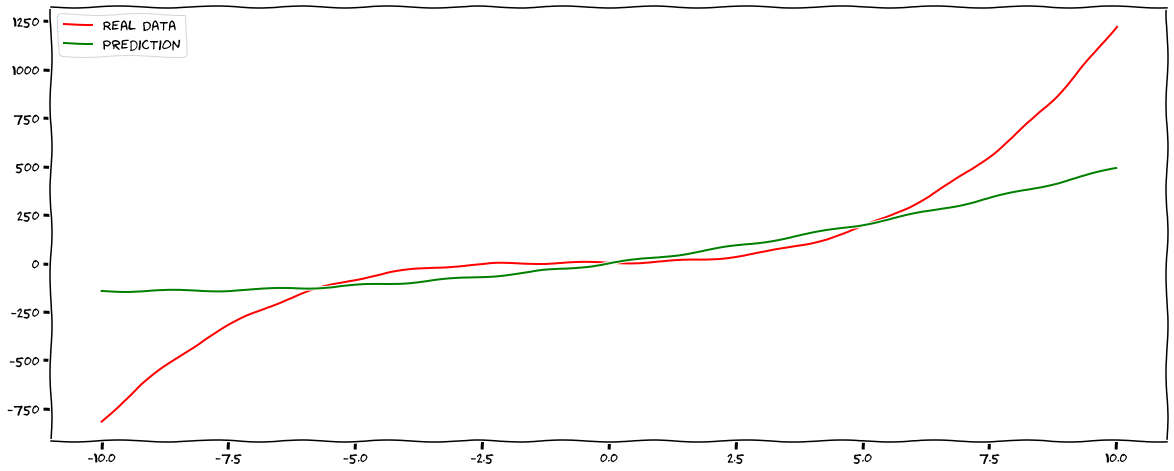

In [ ]:
PhiX = polynomial_basis_function(X[:500], 2) # 500 data used as training
w = gradient_descent_function(PhiX, Y = Y[:500], epoch=10000, eta=0.000001) # eta is very small since we want to avoid the overflowing number

y_prediction = predict_poly(polynomial_basis_function(list(X[50:]), 2)) #predict our last data of 50

# Getting the MSE of the overal data to evaluate the model
MSE = np.square(np.subtract(Y[50:],y_prediction)).mean() # https://www.geeksforgeeks.org/python-mean-squared-error/
print("\nMSE: " + str(MSE) + "\n")

# At last visualize the data
visualize_comp(X[50:] , y_prediction, Y[50:])

## e.

Compare the MSE of your linear model with the regularized models: linear
model with L1-norm and L2-norm with modifying on gradient_function and
gradient_descent_function methods for L1-norm and L2-norm models,
respectively.

MSE-L1(ϕ(X), w, Y) = MSE(ϕ(X), w, Y) + ||w|| α21

MSE-L2(ϕ(X), w, Y) = MSE(ϕ(X), w, Y) + 1/2(||w|| α2)

With ||.||p denotes the p-norm from slide 8 (page 28-30).

### L1

In [ ]:
# SOURCE: https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/tutorials/tut1.pdf

# As seen as the previous sub problem, we use basically the same of model, only modifying the return MSE gradient at last row
# New function made to retain from confusion from the previous problem
def gradient_function_l1(w, Phi_X, Y, alpha=0.1):
  N, D = np.shape(PhiX)
  y_pred = np.matmul(PhiX, w)
  error = y_pred - Y

  # added + np.dot(w, alpha) at the end of the formula for the cost function
  return np.matmul(np.transpose(PhiX), error) / N * 2 + np.dot(w, alpha)

In [ ]:
# Source: https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/tutorials/tut1.pdf


# New function made to retain from confusion from the previous problem, the diffrence only relied on the dw function
def gradient_descent_function_l1(PhiX, Y, print_every=2500, epoch=100000, eta=0.005, alpha=0.1):
  N, D = np.shape(PhiX)
  w = np.zeros([D])
  for k in range(epoch):
    dw = gradient_function_l1(w, PhiX, Y, alpha) # using l1-norm gradient function
    w = w - eta*dw
    if k % print_every == 0:
      print('Weight after %d iteration: %s' % (k, str(w)))

  print('\nFinal weight ' + (str(w))) # Print the final weight
  return w

Weight after 0 iteration: [3.14040220e-02 6.97670737e-04 4.33939980e-04 1.29600139e-05]
Weight after 2500 iteration: [1.0231936  1.34727141 0.02204169 0.02283817]
Weight after 5000 iteration: [1.02577912 1.81746861 0.0283706  0.03143863]
Weight after 7500 iteration: [1.02663034 1.98096197 0.03406436 0.03507449]

Final weight [1.02687853 2.0377866  0.03952595 0.03698299]

MSE: 30.632588430279156



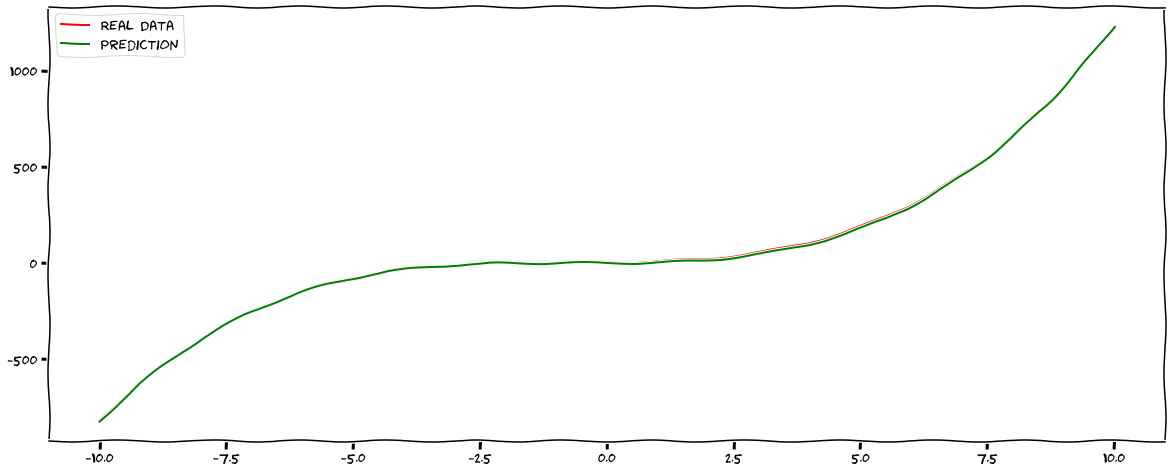

In [ ]:
PhiX = polynomial_basis_function(X[:500], 3) # 500 data used as training
w = gradient_descent_function_l1(PhiX, Y = Y[:500], epoch=10000, eta=0.0000001, alpha=1e-07) # eta is even smaller than without regulatization to avoid 
                                                                                             # the overflowing number

y_prediction = predict_poly(polynomial_basis_function(list(X[50:]), 3)) #predict our last data of 50

# Getting the MSE of the overal data to evaluate the model
MSE = np.square(np.subtract(Y[50:],y_prediction)).mean() # https://www.geeksforgeeks.org/python-mean-squared-error/
print("\nMSE: " + str(MSE) + "\n")

# At last visualize the data
visualize_comp(X[50:] , y_prediction, Y[50:])

### L2

In [ ]:
# SOURCE: https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/tutorials/tut1.pdf

# As seen as the previous sub problem, we use basically the same of model, only modifying the return MSE gradient at last row
# New function made to retain from confusion from the previous problem
def gradient_function_l2(w, Phi_X, Y, alpha=0.1):
  N, D = np.shape(PhiX)
  y_pred = np.matmul(PhiX, w)
  error = y_pred - Y

  # add + (1/2*np.dot(w, alpha)**2) base on the slide 8 formula for l2 to the cost function
  return (np.matmul(np.transpose(PhiX), error) / N * 2) + (1/2*np.dot(w, alpha)**2)

In [ ]:
# Source: https://www.cs.toronto.edu/~rgrosse/courses/csc321_2018/tutorials/tut1.pdf


# New function made to retain from confusion from the previous problem, the diffrence only relied on the dw function
def gradient_descent_function_l2(PhiX, Y, print_every=2500, epoch=100000, eta=0.005, alpha=0.1):
  N, D = np.shape(PhiX)
  w = np.zeros([D])
  for k in range(epoch):
    dw = gradient_function_l2(w, PhiX, Y, alpha) # using l1-norm gradient function
    w = w - eta*dw
    if k % print_every == 0:
      print('Weight after %d iteration: %s' % (k, str(w)))

  print('\nFinal weight ' + (str(w))) # Print the final weight
  return w

Weight after 0 iteration: [3.14040220e-02 6.97670737e-04 4.33939980e-04 1.29600139e-05]
Weight after 2500 iteration: [1.0231936  1.34727141 0.02204169 0.02283817]
Weight after 5000 iteration: [1.02577912 1.81746861 0.0283706  0.03143863]
Weight after 7500 iteration: [1.02663034 1.98096197 0.03406436 0.03507449]

Final weight [1.02687853 2.0377866  0.03952595 0.03698299]

MSE: 30.63258842424314



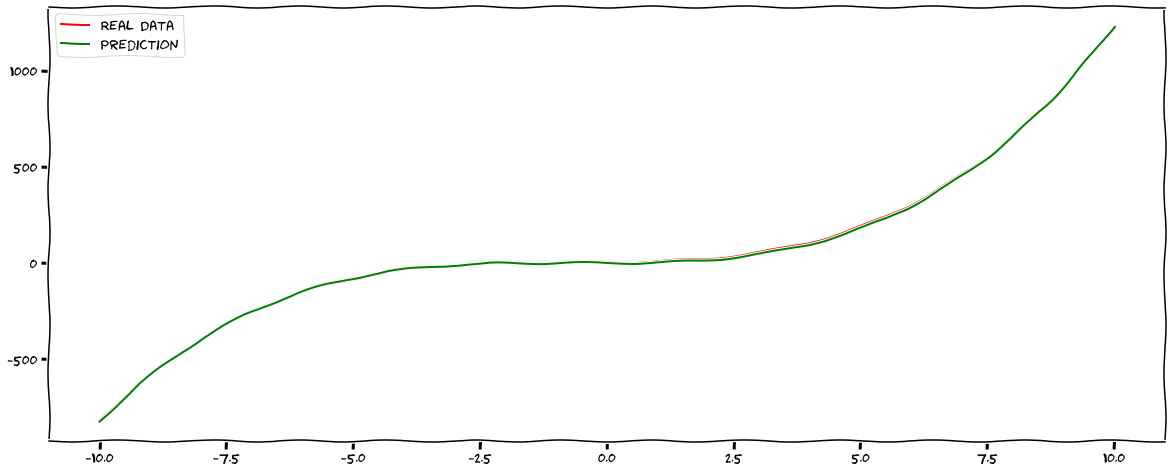

In [ ]:
PhiX = polynomial_basis_function(X[:500], 3) # 500 data used as training
w = gradient_descent_function_l2(PhiX, Y = Y[:500], epoch=10000, eta=0.0000001, alpha=1e-05) # eta is even smaller than without regulatization to avoid 
                                                                          # the overflowing number
                                                                          # we use basesline alpha from the slide for this model (but open for modifying)

y_prediction = predict_poly(polynomial_basis_function(list(X[50:]), 3)) #predict our last data of 50

# Getting the MSE of the overal data to evaluate the model
MSE = np.square(np.subtract(Y[50:],y_prediction)).mean() # https://www.geeksforgeeks.org/python-mean-squared-error/
print("\nMSE: " + str(MSE) + "\n")

# At last visualize the data
visualize_comp(X[50:] , y_prediction, Y[50:])

## f.

### Thoughts

Summary of the performance:

- MSE of model without normalization : 24.702422105740137
- MSE of model with L1-norm : 30.632588430279156
- MSE of model with L2-norm : 30.63258842424314

### **Key takeaways**

There is very slightly difference on the model without normalization to with L1 or L2 normalization. However, the one without normalization gave better performance than ones with normalization. We provides some assumptions on this result:

1. The goal of normalization is to eliminate the diversity of the data, it surpressed the data to be closer to one another, however, since our initial dataset already provided with 'enough' diversity, the normal model
2. The lesser diversity of the data, the lesser the model get the recognition of the data. Impacted to the loss of information to the model. Hence, lower performance.
3. We used very small learning rate (eta) and small learning rate doesnt impact much on the weights. However, increasing the learning rate created overflowing number. Overflowing number (or in this case, weight) is overflowing due to the number exceed the range of number that can be handled.

Disclaimer: As seen on the first graph and the result of Mean Squared Error, this model fits perfectly to the actual target until the line of the real data is very much not visible. As comparison, we provide the visualization and MSE result from degree polynomial of 2 (baseline linear regression).

## g.

The Bayesian approach on the same dataset that implement 2 methods: posterior
model and posterior predictive model. The posterior model acts to infer the
parameter of w given the data ϕ(X), and the ground-truth Y. Posterior
predictive distribution marginalizes the prediction y given Xtest over w. With hyperparameters α and β. Using
Tutorial-1 as the starting point to build the Bayesian model.

In [ ]:
# since the tutorial_1 approach is using numpy array, the X and Y in this problem that previously list and pandas series
# changed to np array, reshaping the model to match the tutorial_1 guide on it

X = np.array(X.copy()).reshape(550,1)
Y = np.array(Y.copy()).reshape(550,1)

# take first 500 data for training
x_in = X[:500]
y_in = Y[:500]

# take last 50 for testing
x_test = X[50:]
y_test = Y[50:]

In [ ]:
def posterior(Phi_X, y, alpha, beta):
    # Computes mean and covariance matrix of the posterior distribution.
    
    #code SN-inverse here
    S_N_inv =  alpha * np.eye(Phi_X.shape[1]) + beta * Phi_X.T.dot(Phi_X)

    # np.eye -> diagonal 2-D array from a 1-D array specified by the user. -> match the shape
    # dot -> product of the matric

    #code SN here
    S_N = np.linalg.inv(S_N_inv) #inverse the SN

    #code mN here
    m_N = beta * S_N.dot(Phi_X.T).dot(y)
    
    return m_N, S_N


def posterior_predictive(Phi_X_test, m_N, S_N, beta):
    # Computes mean and variances of the posterior predictive distribution.

    # compute y_mean here
    y_mean = Phi_X_test.dot(m_N)

    # compute y_var here
    y_var = 1 / beta + np.sum(Phi_X_test.dot(S_N) * Phi_X_test, axis=1)
    
    return y_mean, y_var

In [ ]:
# Transform the data input and testing so the funtion model stated before 
# can operate the input

Phi_X = np.concatenate([np.ones(X.shape), X], axis=1)
x_in = np.concatenate([x_in, np.ones([np.shape(x_in)[0], 1])], axis=1)
Phi_X_test = np.concatenate([np.ones(x_test.shape), x_test], axis=1)

In [ ]:
# We decided to use tutorial_1 hyperparameters for this case also
w0 = 0.5
w1 = -0.5

BETA = 1.0
ALPHA = 1.0

In [ ]:
# Mean and variance of posterior
m_N, S_N = posterior(Phi_X, Y, ALPHA, BETA)

# Mean and variances for posterior prediction
y_mean, y_var = posterior_predictive(Phi_X_test, m_N, S_N, BETA)

In [ ]:
# MSE = np.square(np.subtract(y_test,y_mean).mean()) # https://www.geeksforgeeks.org/python-mean-squared-error/
# print("MSE: " + str(MSE) + "\n") # the MSE result is very small, the model suits the dataset

# **Problem 2**

### a. 
Use citrus.csv for the dataset and split the dataset into training, validation, and testing sets (ratio 60:15:25).

In [ ]:
url='https://drive.google.com/file/d/1-L5fIIiJRZJHTVOOK0RTGdf3KMWT0tl-/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_citrus = pd.read_csv(url2)

# Quick glimpse at the dataset
df_citrus.head(3)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2


In [ ]:
# To ease the model and the evaluation later we map the class into the binary value
# with ORANGE as 0 and GRAPEFRUIT as 1
df_citrus.name = df_citrus.name.replace("orange", 0)
df_citrus.name = df_citrus.name.replace("grapefruit", 1)

In [ ]:
# Determining the training columns in df_x and the target columns in df_y
df_x = pd.DataFrame(df_citrus[["diameter", "weight", "red", "green", "blue"]])
df_y = pd.DataFrame(df_citrus["name"])

In [ ]:
# SOURCE on FULL TRAINING AND TESTING MODE: Tutorial 1 on Logistic Regression

# Source for dataset splitting: https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn
from sklearn.model_selection import train_test_split # Split dataset into the training and testing data

# Since the guide is to divided the data into ratio of train:val:test = 60:15:25
# The data will be parted on this part to be training+val and testing only
# The validation will be set on the cross validation function below
# The fold of cross validation with the ratio stated on the problem will be explained later

train_ratio = 0.75
test_ratio = 0.25

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=1 - train_ratio)

In [ ]:
from sklearn.preprocessing import MinMaxScaler # Libraries to normalize the data since the gap of mean from each data is quite high

scaler = MinMaxScaler().fit(x_train) # normalization model

x_train = scaler.transform(x_train) # fit the normalization with minmax scale for the training data
x_test = scaler.transform(x_test) # then for the test data also

In [ ]:
# Core libraries that used for no regularization, L1, and L2
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_score

Accuracy function

In [ ]:
# To ease the validation for 3 of the model, we decided to create one new function to be used
# this fucntion include evaluation of accuracy, recall, and precision of the model with cross validation

def evaluate_with_cv(model, name_of_model="this"):
  evaluation_list = ['accuracy', 'precision', 'recall']

  for i in evaluation_list:
    scores = cross_val_score(model, x_train, y_train.values.ravel(), cv=5,scoring=i)
    # the folding is 5 due to the ration 60:15:25, 15 of 75 data ratio is 1/5, we divided the data into 5 part
    print(i + " of model " + name_of_model + "is: " + str(scores.mean()))

### No Regularization

In [ ]:
# Training data with importing the model function directly from the library
# we didn't modify other parameters and only change the penalty parameters that used to define the regularization
# however we also include the solver saga so that it can provde us with L1, L2, and No Regularization
# tol or tolerance is the criteria of stoping so that our model is convergence, we will later explain why we want our model to be convergence

model_none = LogisticRegression(penalty="none", tol=0.01, solver='saga').fit(x_train, y_train.values.ravel())

# Testing the model we trained
y_pred_none = model_none.predict(x_test)

In [ ]:
evaluate_with_cv(model_none, "No Regularization")

accuracy of model No Regularizationis: 0.9370666666666667
precision of model No Regularizationis: 0.9355198515619145
recall of model No Regularizationis: 0.9404312715314207


### L1

In [ ]:
# Training data with importing the model function directly from the library
# we didn't modify other parameters and only change the penalty parameters that used to define the regularization
# however we also include the solver saga so that it can provde us with L1, L2, and No Regularization
# tol or tolerance is the criteria of stoping so that our model is convergence, we will later explain why we want our model to be convergence

model_l1 = LogisticRegression(penalty="l1", tol=0.01, solver='saga').fit(x_train, y_train.values.ravel())

# Testing the model we trained
y_pred_l1 = model_l1.predict(x_test)

In [ ]:
evaluate_with_cv(model_l1, "L1 Regularization")

accuracy of model L1 Regularizationis: 0.9293333333333333
precision of model L1 Regularizationis: 0.931993344905856
recall of model L1 Regularizationis: 0.9280444690103977


### L2

In [ ]:
# Training data with importing the model function directly from the library
# we didn't modify other parameters and only change the penalty parameters that used to define the regularization
# however we also include the solver saga so that it can provde us with L1, L2, and No Regularization
# tol or tolerance is the criteria of stoping so that our model is convergence, we will later explain why we want our model to be convergence

model_l2 = LogisticRegression(penalty="l2", tol=0.01, solver='saga').fit(x_train, y_train.values.ravel())

# Testing the model we trained
y_pred_l2 = model_l2.predict(x_test)

In [ ]:
evaluate_with_cv(model_l2, "L2 Regularization")

accuracy of model L2 Regularizationis: 0.9273333333333333
precision of model L2 Regularizationis: 0.9315100715087329
recall of model L2 Regularizationis: 0.9243543615575278


### ROC

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [ ]:
# Number of possibility from the testing set
ns_probs = [0 for _ in range(len(y_test))]

In [ ]:
# get the likelihood ratio for the slope of the roc curve later
lr_probs_l1 = model_l1.predict_proba(x_test)
lr_probs_l1 = lr_probs_l1[:, 1]
lr_probs_l2 = model_l2.predict_proba(x_test)
lr_probs_l2 = lr_probs_l2[:, 1]
lr_probs_none = model_none.predict_proba(x_test)
lr_probs_none = lr_probs_none[:, 1]

# get the positivity and false rate of each model
ns_fpr_l1, ns_tpr_l1, _ = roc_curve(y_test, ns_probs)
lr_fpr_l1, lr_tpr_l1, _ = roc_curve(y_test, lr_probs_l1)
ns_fpr_l2, ns_tpr_l2, _ = roc_curve(y_test, ns_probs)
lr_fpr_l2, lr_tpr_l2, _ = roc_curve(y_test, lr_probs_l2)
ns_fpr_none, ns_tpr_none, _ = roc_curve(y_test, ns_probs)
lr_fpr_none, lr_tpr_none, _ = roc_curve(y_test, lr_probs_none)

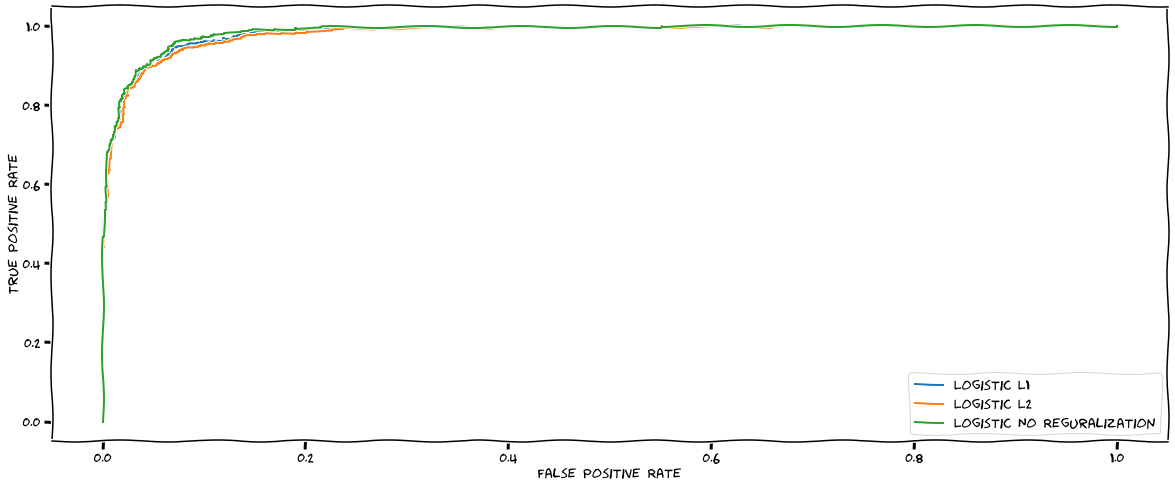

In [ ]:
with plt.xkcd():
  fig, ax = plt.subplots(1, 1, figsize=(20, 8))

  # plot the roc curve for the model
  pyplot.plot(lr_fpr_l1, lr_tpr_l1, label='Logistic L1')
  pyplot.plot(lr_fpr_l2, lr_tpr_l2, label='Logistic L2')
  pyplot.plot(lr_fpr_none, lr_tpr_none, label='Logistic No Reguralization')


  # axis labels
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')

  # show the legend
  pyplot.legend()

  # show the plot
  pyplot.show()

### Confidence of Interval

In [ ]:
# evaluating the accuracy

accuracy_none = cross_val_score(model_none, x_train, y_train.values.ravel(), cv=5,scoring='accuracy').mean()
accuracy_l1 =cross_val_score(model_l1, x_train, y_train.values.ravel(), cv=5,scoring='accuracy').mean()
accuracy_l2 = cross_val_score(model_l2, x_train, y_train.values.ravel(), cv=5,scoring='accuracy').mean()

In [ ]:
# CI Formula: error +/- const * sqrt( (error * (1 - error)) / n)
# While const or Z is 1.96

def confidence_interval(accuracy, Z =1.96, model_name="this"):
  # error will be defined as the remain data that doesnt predicted correctly from the model
  # so then error is 1 - the accuracy
  error = 1 - accuracy
  
  ci = error + Z * np.sqrt((error*1-error)/len(x_train))

  print("Confidence of interval for model " + model_name + " is " + str(ci))

In [ ]:
confidence_interval(accuracy_none, 1.96, "No Regularization")
confidence_interval(accuracy_l1, 1.96, "L1 Regularization")
confidence_interval(accuracy_l2, 1.96, "L2 Regularization")

Confidence of interval for model No Regularization is 0.06293333333333329
Confidence of interval for model L1 Regularization is 0.07079999999999997
Confidence of interval for model L2 Regularization is 0.07253333333333334


### Thoughts on the results

**Key takeaways**:
- As ROC summarizes all the sensitivity rate (true and false) from the confusion metric, the ROC values in graph is also slightly the same to all 3 models. The best one that is close to point (0,1) is represented by No Regularization model.
- As Confidence of Intervals indicates how much uncertainity of the result, all from 3 models return very low uncertainity, the best one, reflected in No Regularization model.
- Just as how the result of the previous problem where model without regularization gave better performance, we have same assumptions as the last one. The dataset that is considered small and doesn't required complex regularization. Also we already made sure that the tolerance (tol) parameters already stop the process of training to retain on getting overfitting model. The model we have is already the best can be provided.
- Data already normalized first with the MinMax scaler so the regularization didn't bring significance difference to the one without regularization.

## [Bonus] c. Bayesian Logistic Regression

In [ ]:
url='https://drive.google.com/file/d/1-L5fIIiJRZJHTVOOK0RTGdf3KMWT0tl-/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_citrus = pd.read_csv(url2)

# Quick glimpse at the dataset
df_citrus.head(3)

,name,diameter,weight,red,green,blue
0,orange,2.96,86.76,172,85,2
1,orange,3.91,88.05,166,78,3
2,orange,4.42,95.17,156,81,2


In [ ]:
# To ease the model and the evaluation later we map the class into the binary value
# with ORANGE as 0 and GRAPEFRUIT as 1
df_citrus.name = df_citrus.name.replace("orange", 0)
df_citrus.name = df_citrus.name.replace("grapefruit", 1)

In [ ]:
# Determining the training columns in df_x and the target columns in df_y
df_x = pd.DataFrame(df_citrus[["diameter", "weight", "red", "green", "blue"]])
df_y = pd.DataFrame(df_citrus["name"])

Disclaimer: we took a very comprehensive and detailed function from [Van-Tuan Nguyen](https://github.com/NVTACSI) for the logistic bayesian  model and its visualization. We take no credit for the function and stated the function on the document merely to import the function just as how we imported a library.

For explanation, paramaters description, and algorithm used can be seen on the documentation of the function here:
https://github.com/NVTACSI/Bayesian-Logistic-Regression/blob/master/Bayesian%20Logistic%20Regression.ipynb

In [ ]:
from numpy.linalg import inv
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score 

In [ ]:
def logJoinLikelihood(X, t, w, p_m, p_v):
    p = 1/(1+np.exp(-X.dot(w)))
    loglikelihood = np.sum((t * np.log(p) + (1 - t) * np.log(1 - p)))
    logPrior = np.log(multivariate_normal.pdf(w, p_m, p_v))

    logJoinLikelihood = loglikelihood + logPrior
    
    return logJoinLikelihood

In [ ]:
def logJoinLikelihood_grad(X, t, w, p_m, p_v):
    p = 1/(1 + np.exp(-X.dot(w)))
    grad = (X.T.dot(t-p) + inv(p_v).dot(w-p_m))

    return grad

In [ ]:
def logJoinLikelihood_hess(X, t, w, p_m, p_v):
    p = 1/(1 + np.exp(-X.dot(w)))
    hess = ((X.T*(p*(1-p))).dot(X) + inv(p_v))

    return hess

In [ ]:
def NewtonRaphson(X, t, w, p_m, p_v, eta, tol, max_iter):
    loss = 1e5
    losses = []
    w_opt = 0 # immediately stop if w reach 0
    
    for i in range(max_iter):
        grad = logJoinLikelihood_grad(X, t, w, p_m, p_v)
        hess = logJoinLikelihood_hess(X, t, w, p_m, p_v)
            
        w_new = w + eta * inv(hess).dot(grad)
        
        loss_new = logJoinLikelihood(X, t, w_new, p_m, p_v)
        if (abs(loss_new - loss) < tol):
            break
        else:
            losses.append(loss_new)
            loss, w = loss_new, w_new
            
        w_opt = w_new
    
    return w_opt, losses

In [ ]:
class BayesianLogistic(object):
   
    def __init__(self, p_m, p_v, solver='newton', eta=1e-3, tol=1e-5, max_iter=100):
      
        self.p_m = p_m
        self.p_v = p_v
        self.solver = solver
        self.eta = eta
        self.tol = tol
        self.max_iter = max_iter
        

    def fit(self, X, t):
        
        w_init = 1e-3*np.ones(X.shape[1])

        if (self.solver == 'gd'):
            self.coef_, self.losses_ = GradientDescent(X, t, w_init, self.p_m, self.p_v, self.eta, self.tol, self.max_iter)
        else:
            self.coef_, self.losses_ = NewtonRaphson(X, t, w_init, self.p_m, self.p_v, self.eta, self.tol, self.max_iter)
    
        return self
    
    
    def predict(self, X):
        pred = []
        
        for p in 1/(1+np.exp(-X.dot(self.coef_))):
            if p <= 0.5:
                pred.append(0)
            else:
                pred.append(1)
        
        return np.array(pred)

In [ ]:
def plot_confusion_matrix(y_true, y_pred, cmap=plt.cm.Blues):

    # Create confusion matrix

    cm = confusion_matrix(y_true, y_pred)
    cm_normalize = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    classes = unique_labels(y_true, y_pred)

    fig, ax = plt.subplots(1,2, figsize=(20, 8))
    ax[0].imshow(cm, interpolation='nearest', cmap=cmap)
    ax[1].imshow(cm_normalize, interpolation='nearest', cmap=cmap)
    
    ax[0].set_xlabel("Predicted label", weight="semibold", color='b', size=15)
    ax[0].set_ylabel("True label", weight="semibold", color='b', size=15)
    ax[0].set_title("Confusion matrix, without normalization", weight="semibold", color='r', size=15)
    ax[0].set_xticks(classes)
    ax[0].set_yticks(classes)
    
    ax[1].set_xlabel("Predicted label", weight="semibold", color='b', size=15)
    ax[1].set_ylabel("True label", weight="semibold", color='b', size=15)
    ax[1].set_title("Confusion matrix, with normalization", weight="semibold", color='r', size=15)
    ax[1].set_xticks(classes)
    ax[1].set_yticks(classes)

    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax[0].text(j, i, format(cm[i, j], 'd'), ha="center", va="center", color="r", fontsize=30, weight="semibold")
            ax[1].text(j, i, format(cm_normalize[i, j], '.2f'), ha="center", va="center", color="r", fontsize=30, weight="semibold")

    fig.tight_layout()

In [ ]:
# prior distribution setting
prior_variance = 1e2*np.eye(5)
prior_mean = np.zeros(5)

# apply Bayesian logistic regression on training data (Newton-Raphson method)
model = BayesianLogistic(p_m=prior_mean, p_v=prior_variance, solver='newton', eta=0.01, max_iter=100)
model.fit(x_train, y_train.to_numpy().reshape(-1))

Accuracy of the bayesian regression model is: 0.924



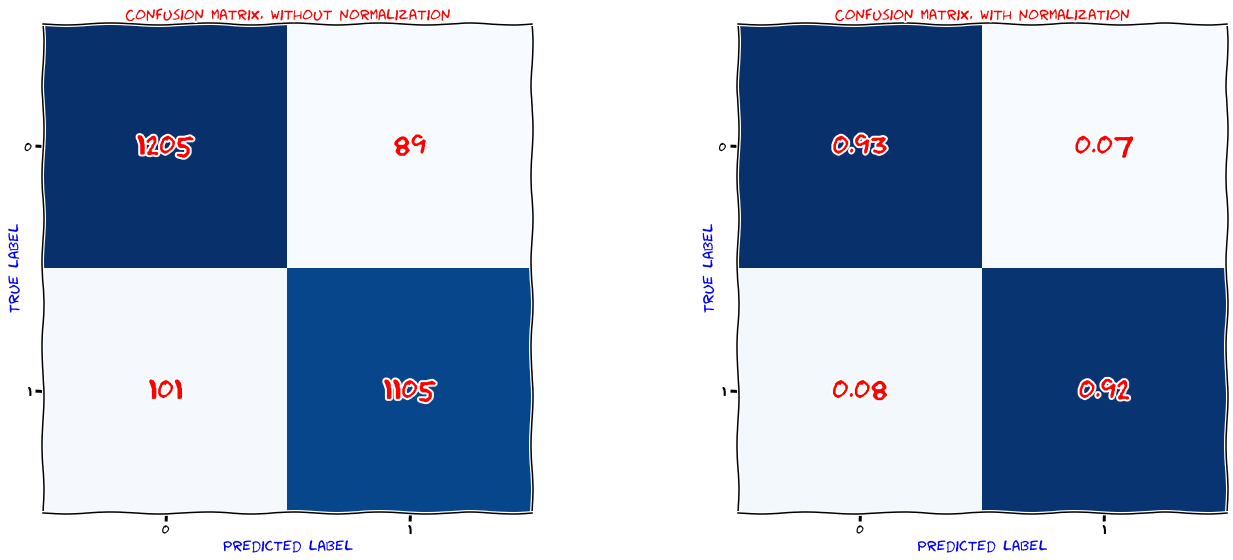

In [ ]:
pred = model.predict(x_test)
bayesian_acc = accuracy_score(pred, y_test)

print("Accuracy of the bayesian regression model is: " + str(bayesian_acc) + "\n")

# Plot confusion matrix
with plt.xkcd():
  plot_confusion_matrix(y_test, pred)
  plt.show()

# **Problem 3**

##a.
Use the same dataset for Logistic Linear Regression.

In [ ]:
url='https://drive.google.com/file/d/1-L5fIIiJRZJHTVOOK0RTGdf3KMWT0tl-/view?usp=sharing'
url2='https://drive.google.com/uc?id=' + url.split('/')[-2]
df_citrus = pd.read_csv(url2)

In [ ]:
df_citrus.name = df_citrus.name.replace("orange", 0)
df_citrus.name = df_citrus.name.replace("grapefruit", 1)

df_x = pd.DataFrame(df_citrus[["diameter", "weight", "red", "green", "blue"]])
df_y = pd.DataFrame(df_citrus["name"])

Split the dataset into training, validation, and testing sets (ratio 60:15:25)

In [ ]:
# Different with the logistic regression, the data is already split 
from sklearn.model_selection import train_test_split

train_ratio = 0.6
validation_ratio = 0.15
test_ratio = 0.25

x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=1 - train_ratio)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=test_ratio/(test_ratio + validation_ratio))

In [ ]:
from sklearn.preprocessing import MinMaxScaler # Libraries to normalize the data since the gap of mean from each data is quite high

scaler = MinMaxScaler().fit(x_train) # normalization model

x_train = scaler.transform(x_train) # fit the normalization with minmax scale for the training data
x_test = scaler.transform(x_test) # then for the test data also

In [ ]:
# since keras use numpy array to process the data, we converted the format to numpy

y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

# and reshape the numpy following the input size on input layer later
y_train = y_train.reshape((-1,))
y_test = y_test.reshape((-1,))

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6000, 5), (6000,), (2500, 5), (2500,))

Import Libraries

In [ ]:
import keras # core library that will be used for training the artificial neural network (NN)
from keras.models import Sequential # function to create model layers of the NN
from keras.layers import Dense # function to add layers for the ANN architecture
import tensorflow as tf # additional library to support the keras library

##b.

See Table below for ANN architecture. 
**Hyperparameters:**
- Optimizer: Adam (learning rate = 0.001)
- Loss: Binary cross entropy
- Metrics: Accuracy
- Activation function: ReLu and sigmoid (output layer)
- Epochs: 10

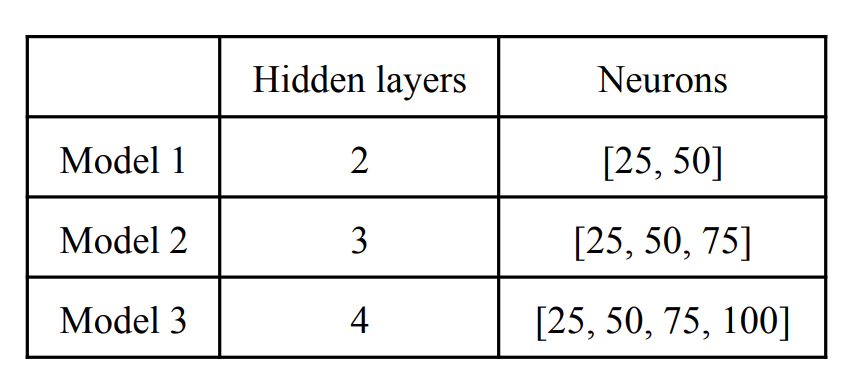

## Model 1

In [ ]:
# SOURCE: https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88

model_1 = tf.keras.Sequential([
    # input layer, pass the size of array as defined by the reshaped                               
    tf.keras.layers.Dense(units=1,input_shape=[5]), 
    # hidden layers with neurons units and activation function following the instruction
    tf.keras.layers.Dense(units=25, activation='relu'), 
    tf.keras.layers.Dense(units=50, activation='relu'),
     # output layer with activation sigmoid stated
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

# with parameter given, applied the hyperparameters 
# the optimizer (with default learning rate same as stated on the instruction)
# in process of training, keras will also print the metrics
model_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# training the data with epoch stated and validation as splitted before
train_history_model_1 = model_1.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 1s 3ms/step - loss: 0.4840 - acc: 0.7685 - val_loss: 90.2594 - val_acc: 0.4980
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 0.2239 - acc: 0.9097 - val_loss: 128.7758 - val_acc: 0.4980
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 0.2081 - acc: 0.9160 - val_loss: 131.9794 - val_acc: 0.4980
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 0.2009 - acc: 0.9190 - val_loss: 134.4790 - val_acc: 0.4980
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 0.1956 - acc: 0.9198 - val_loss: 135.3951 - val_acc: 0.4987
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 0.1911 - acc: 0.9188 - val_loss: 137.1776 - val_acc: 0.4993
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 0.1895 - acc: 0.9202 - val_loss: 138.2309 - val_acc: 0.5013
Epoch 8/10
188/188 [==============================] - 0s 2ms/st

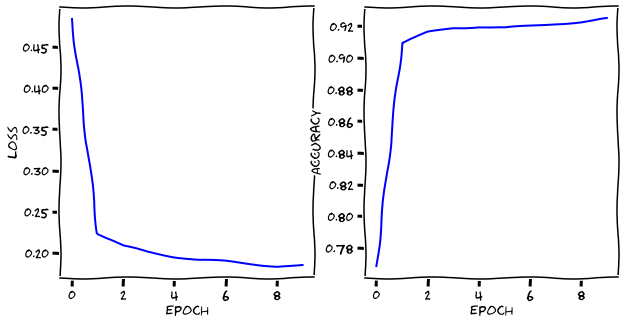

In [ ]:
# visualize the training metrics process with the loss function and the accuracy
import matplotlib.pyplot as plt
with plt.xkcd(): # to create interactive matplot it (not necessary)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(np.arange(10), train_history_model_1.history['loss'], 'b-', label='loss')
    xlab, ylab =  ax[0].set_xlabel('epoch'), ax[0].set_ylabel('loss')
    ax[1].plot(np.arange(10), train_history_model_1.history['acc'], 'b-', label='acc')
    xlab, ylab =  ax[1].set_xlabel('epoch'), ax[1].set_ylabel('Accuracy')

## Model 2

In [ ]:
# SOURCE: https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88

model_2 = tf.keras.Sequential([
    # input layer, pass the size of array as defined by the reshaped                                      
    tf.keras.layers.Dense(units=1, input_shape=[5]),
    # hidden layers with neurons units and activation function following the instruction                            
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=75, activation='relu'),
    # output layer with activation sigmoid stated
    tf.keras.layers.Dense(units=1, activation='sigmoid'),
])

# with parameter given, applied the hyperparameters 
# the optimizer (with default learning rate same as stated on the instruction)
# in process of training, keras will also print the metrics
model_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# training the data with epoch stated and validation as splitted before
train_history_model_2 = model_2.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 1s 3ms/step - loss: 0.5333 - acc: 0.7400 - val_loss: 169.9053 - val_acc: 0.5040
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 0.3469 - acc: 0.8468 - val_loss: 210.7387 - val_acc: 0.5040
Epoch 3/10
188/188 [==============================] - 0s 2ms/step - loss: 0.2712 - acc: 0.8828 - val_loss: 250.7076 - val_acc: 0.5040
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 0.2319 - acc: 0.9000 - val_loss: 313.6609 - val_acc: 0.5040
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 0.2104 - acc: 0.9088 - val_loss: 316.3039 - val_acc: 0.5040
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 0.1955 - acc: 0.9170 - val_loss: 356.9790 - val_acc: 0.5040
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 0.1870 - acc: 0.9195 - val_loss: 375.4040 - val_acc: 0.5040
Epoch 8/10
188/188 [==============================] - 0s 2ms/s

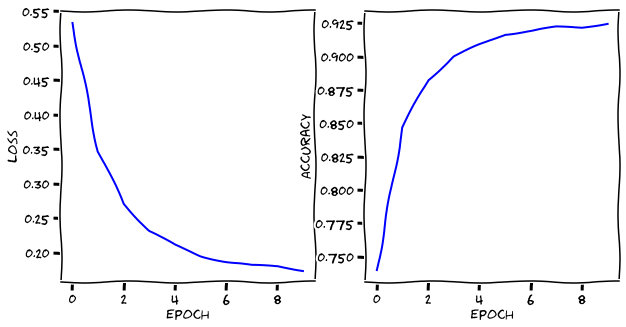

In [ ]:
# visualize the training metrics process with the loss function and the accuracy
import matplotlib.pyplot as plt
with plt.xkcd(): # to create interactive matplot it (not necessary)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(np.arange(10), train_history_model_2.history['loss'], 'b-', label='loss')
    xlab, ylab =  ax[0].set_xlabel('epoch'), ax[0].set_ylabel('loss')
    ax[1].plot(np.arange(10), train_history_model_2.history['acc'], 'b-', label='acc')
    xlab, ylab =  ax[1].set_xlabel('epoch'), ax[1].set_ylabel('Accuracy')

## Model 3

In [ ]:
# SOURCE: https://towardsdatascience.com/a-logistic-regression-from-scratch-3824468b1f88

model_3 = tf.keras.Sequential([
    # input layer, pass the size of array as defined by the reshaped       
    tf.keras.layers.Dense(units=1, input_shape=[5]),
    # hidden layers with neurons units and activation function following the instruction                            
    tf.keras.layers.Dense(units=25, activation='relu'),
    tf.keras.layers.Dense(units=50, activation='relu'),
    tf.keras.layers.Dense(units=75, activation='relu'),
    tf.keras.layers.Dense(units=100,activation='relu'),
    # output layer with activation sigmoid stated
    tf.keras.layers.Dense(units=1, input_shape=[5], activation='sigmoid'),
])

# with parameter given, applied the hyperparameters 
# the optimizer (with default learning rate same as stated on the instruction)
# in process of training, keras will also print the metrics
model_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

# training the data with epoch stated and validation as splitted before
train_history_model_3 = model_3.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

Epoch 1/10
188/188 [==============================] - 1s 3ms/step - loss: 0.6825 - acc: 0.5537 - val_loss: 210.2310 - val_acc: 0.4960
Epoch 2/10
188/188 [==============================] - 0s 2ms/step - loss: 0.5075 - acc: 0.7543 - val_loss: 607.5472 - val_acc: 0.4960
Epoch 3/10
188/188 [==============================] - 0s 3ms/step - loss: 0.3822 - acc: 0.8287 - val_loss: 627.9489 - val_acc: 0.4960
Epoch 4/10
188/188 [==============================] - 0s 2ms/step - loss: 0.3195 - acc: 0.8617 - val_loss: 705.6763 - val_acc: 0.4960
Epoch 5/10
188/188 [==============================] - 0s 2ms/step - loss: 0.2840 - acc: 0.8798 - val_loss: 761.3131 - val_acc: 0.4960
Epoch 6/10
188/188 [==============================] - 0s 2ms/step - loss: 0.2554 - acc: 0.8905 - val_loss: 776.8224 - val_acc: 0.4960
Epoch 7/10
188/188 [==============================] - 0s 2ms/step - loss: 0.2350 - acc: 0.9002 - val_loss: 838.3428 - val_acc: 0.4960
Epoch 8/10
188/188 [==============================] - 0s 2ms/s

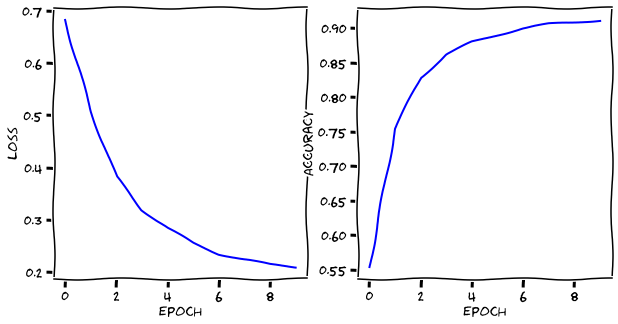

In [ ]:
# visualize the training metrics process with the loss function and the accuracy
import matplotlib.pyplot as plt
with plt.xkcd(): # to create interactive matplot it (not necessary)
    fig, ax = plt.subplots(1, 2, figsize=(10, 5))
    ax[0].plot(np.arange(10), train_history_model_3.history['loss'], 'b-', label='loss')
    xlab, ylab =  ax[0].set_xlabel('epoch'), ax[0].set_ylabel('loss')
    ax[1].plot(np.arange(10), train_history_model_3.history['acc'], 'b-', label='acc')

    xlab, ylab =  ax[1].set_xlabel('epoch'), ax[1].set_ylabel('Accuracy')

## ROC

In [ ]:
# https://hackernoon.com/simple-guide-on-how-to-generate-roc-plot-for-keras-classifier-2ecc6c73115a

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_pred_keras_1 = model_1.predict(x_test).ravel()
fpr_keras_1, tpr_keras_1, thresholds_keras_1 = roc_curve(y_test, y_pred_keras_1)
auc_keras_1 = auc(fpr_keras_1, tpr_keras_1)

y_pred_keras_2 = model_2.predict(x_test).ravel()
fpr_keras_2, tpr_keras_2, thresholds_keras_2 = roc_curve(y_test, y_pred_keras_2)
auc_keras_2 = auc(fpr_keras_2, tpr_keras_2)

y_pred_keras_3 = model_3.predict(x_test).ravel()
fpr_keras_3, tpr_keras_3, thresholds_keras_3 = roc_curve(y_test, y_pred_keras_3)
auc_keras_3 = auc(fpr_keras_3, tpr_keras_3)

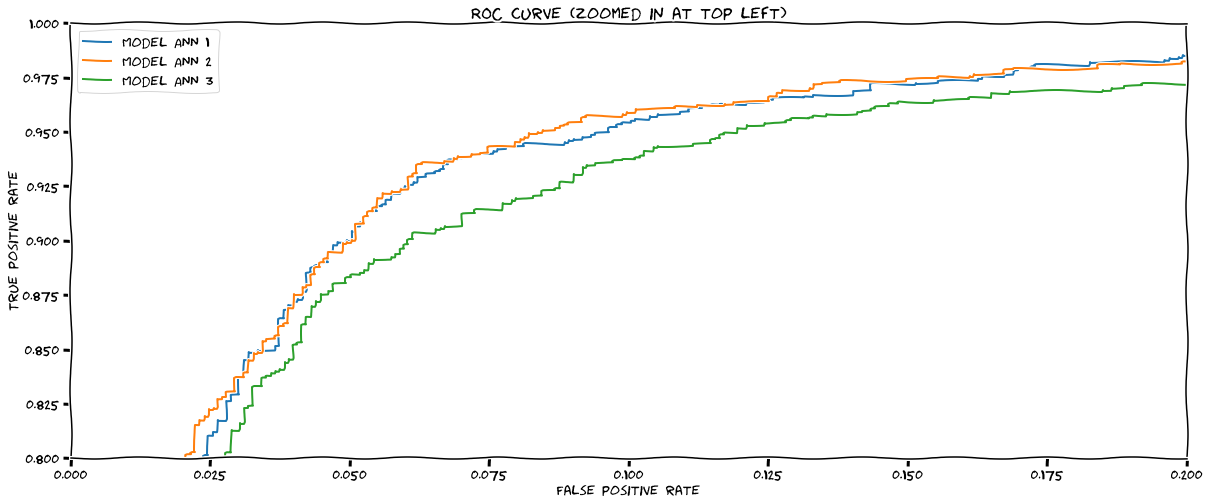

In [ ]:
# Zoom in view of the upper left corner.
with plt.xkcd():
  ax, fig = plt.subplots(1, 1, figsize=(20, 8))
  plt.xlim(0, 0.2)
  plt.ylim(0.8, 1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr_keras_1, tpr_keras_1, label='Model ANN 1')
  plt.plot(fpr_keras_2, tpr_keras_2, label='Model ANN 2')
  plt.plot(fpr_keras_3, tpr_keras_3, label='Model ANN 3')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve (zoomed in at top left)')
  plt.legend(loc='best')
  plt.show()

### Evaluation accuracy, ROC, and Confidence of Interval

In [ ]:
# evaluate the accuracy with testing dataset
# [1] to store only accuracy, function evaluate from keras accustomed to store loss func and accuracy 
accuracy_1 = model_1.evaluate(x_test, y_test)[1]
accuracy_2 = model_2.evaluate(x_test, y_test)[1]
accuracy_3 = model_3.evaluate(x_test, y_test)[1]

79/79 [==============================] - 0s 2ms/step - loss: 0.2198 - acc: 0.9092


In [ ]:
# CI Formula: error +/- const * sqrt( (error * (1 - error)) / n)
# While const or Z is 1.96
# function borrowed from Logistic model, but defining it again here to make clarity of the process

def confidence_interval(accuracy, Z =1.96, model_name="this"):
  # error will be defined as the remain data that doesnt predicted correctly from the model
  # so then error is 1 - the accuracy
  error = 1 - accuracy
  ci = error + Z * np.sqrt((error*1-error)/len(x_train))
  print("Confidence of interval for model " + model_name + " is " + str(ci))

confidence_interval(accuracy_1, Z =1.96, model_name="Model 1")
confidence_interval(accuracy_2, Z =1.96, model_name="Model 2")
confidence_interval(accuracy_3, Z =1.96, model_name="Model 3")

Confidence of interval for model Model 1 is 0.07160001993179321
Confidence of interval for model Model 2 is 0.06599998474121094
Confidence of interval for model Model 3 is 0.09079998731613159


## Combining all the models Citrus classifier

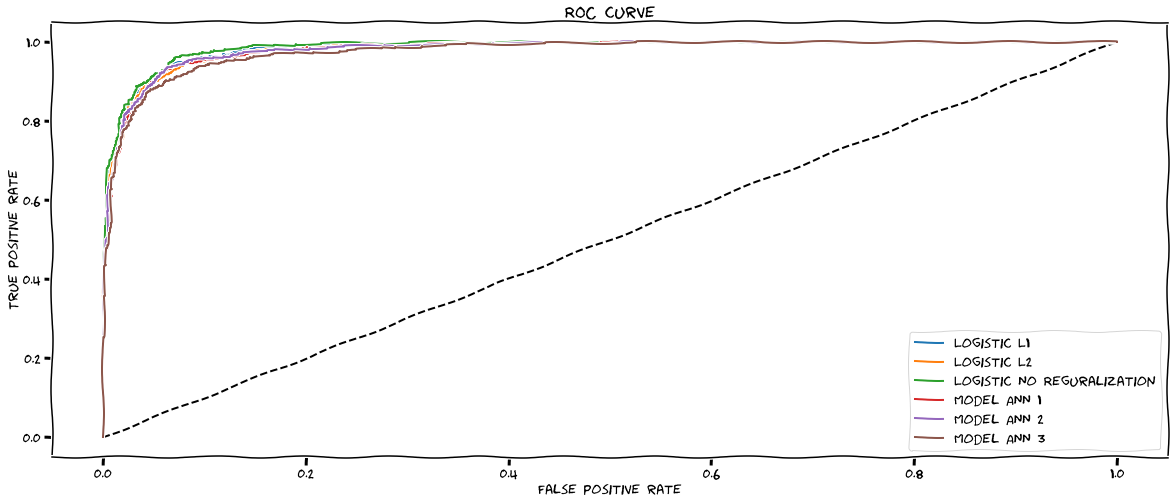

In [ ]:
# Zoom in view of the upper left corner.
with plt.xkcd():
  ax, fig = plt.subplots(1, 1, figsize=(20, 8))
  
  plt.plot([0, 1], [0, 1], 'k--')
  # plot the roc curve for the model
  pyplot.plot(lr_fpr_l1, lr_tpr_l1, label='Logistic L1')
  pyplot.plot(lr_fpr_l2, lr_tpr_l2, label='Logistic L2')
  pyplot.plot(lr_fpr_none, lr_tpr_none, label='Logistic No Reguralization')

  plt.plot(fpr_keras_1, tpr_keras_1, label='Model ANN 1')
  plt.plot(fpr_keras_2, tpr_keras_2, label='Model ANN 2')
  plt.plot(fpr_keras_3, tpr_keras_3, label='Model ANN 3')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve')
  plt.legend(loc='best')
  plt.show()

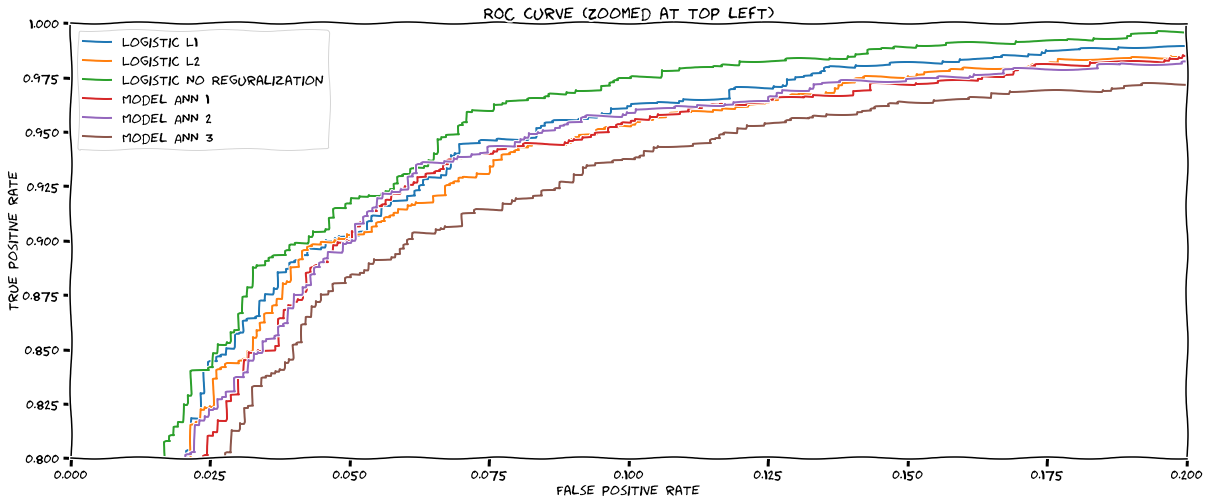

In [ ]:
# Zoom in view of the upper left corner.
with plt.xkcd():
  ax, fig = plt.subplots(1, 1, figsize=(20, 8))

  plt.xlim(0, 0.2)
  plt.ylim(0.8, 1)  
  plt.plot([0, 1], [0, 1], 'k--')
  # plot the roc curve for the model
  pyplot.plot(lr_fpr_l1, lr_tpr_l1, label='Logistic L1')
  pyplot.plot(lr_fpr_l2, lr_tpr_l2, label='Logistic L2')
  pyplot.plot(lr_fpr_none, lr_tpr_none, label='Logistic No Reguralization')

  plt.plot(fpr_keras_1, tpr_keras_1, label='Model ANN 1')
  plt.plot(fpr_keras_2, tpr_keras_2, label='Model ANN 2')
  plt.plot(fpr_keras_3, tpr_keras_3, label='Model ANN 3')
  plt.xlabel('False positive rate')
  plt.ylabel('True positive rate')
  plt.title('ROC curve (Zoomed at top left)')
  plt.legend(loc='best')
  plt.show()

In [ ]:
# CI Formula: error +/- const * sqrt( (error * (1 - error)) / n)
# While const or Z is 1.96

confidence_interval(accuracy_1, Z =1.96, model_name="ANN Model 1")
confidence_interval(accuracy_2, Z =1.96, model_name="ANN Model 2")
confidence_interval(accuracy_3, Z =1.96, model_name="ANN Model 3")
confidence_interval(accuracy_none, 1.96, "Logistic Regression No Regularization")
confidence_interval(accuracy_l1, 1.96, "Logistic Regression L1 Regularization")
confidence_interval(accuracy_l2, 1.96, "Logistic Regression L2 Regularization")
print("\n")
confidence_interval(bayesian_acc, 1.96, "Bayesian Regression Model")

Confidence of interval for model ANN Model 1 is 0.07160001993179321
Confidence of interval for model ANN Model 2 is 0.06599998474121094
Confidence of interval for model ANN Model 3 is 0.09079998731613159
Confidence of interval for model Logistic Regression No Regularization is 0.06293333333333329
Confidence of interval for model Logistic Regression L1 Regularization is 0.07079999999999997
Confidence of interval for model Logistic Regression L2 Regularization is 0.07253333333333334


Confidence of interval for model Bayesian Regression Model is 0.07599999999999996


## e. 

Significance test & Final Thought

### McNemar Statistical Significance Test

We used McNemar statistical test to ease the performance evaluation from different method conventional vs deep learning. It also used to prevent the Type I error of false positive of null hypothesis rejection.

In [ ]:
# SOURCE: https://machinelearningmastery.com/statistical-significance-tests-for-comparing-machine-learning-algorithms/
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

In [ ]:
y_pred_none = model_none.predict(x_test)
y_pred_l1 = model_l1.predict(x_test)
y_pred_l2 = model_l2.predict(x_test)

y_pred_keras_1 = (model_1.predict(x_test) > 0.125).astype("int32").reshape(-1)
y_pred_keras_2 = (model_2.predict(x_test) > 0.125).astype("int32").reshape(-1)
y_pred_keras_3 = (model_3.predict(x_test) > 0.125).astype("int32").reshape(-1)

all_models = {"No regularization": y_pred_none, 
                   "L1 regularization Logistic Regression":y_pred_l1, 
                   "L2 regularization Logistic Regression":y_pred_l2,
                   "Model ANN 1":y_pred_keras_1,
                   "Model ANN 2":y_pred_keras_2,
                   "Model ANN 3":y_pred_keras_3}

Comparing all the models to No Regularization with hypothesis that each model has different error proportions.

In [ ]:
# Example of calculating the mcnemar test
from statsmodels.stats.contingency_tables import mcnemar

def mcnemar_model(input_models):
  for i in range(len(all_models)):
    if (input_models == list(all_models.keys())[i]) == False:
      # Contigency table provides information of TP, FN, FP, FN, but not only comparing it to the test set
      # but also to model 1 and model 2. Therefore, we compare both prediction 
      # with test case by taking the True/False value
      table = pd.crosstab(list(all_models.values())[i]==y_test, all_models[input_models]==y_test, margins = False)
      # calculate mcnemar test from the contigency table
      result = mcnemar(table)
      # summarize the finding
      print('statistic=%.3f, p-value=%.3f' % (result.statistic, result.pvalue))
      # interpret the p-value
      alpha = 0.05
      # Result taken from the p value, following this source https://machinelearningmastery.com/mcnemars-test-for-machine-learning/
      if result.pvalue > alpha:
        print(input_models +  ' & '+ list(all_models.keys())[i] + ' have SAME proportions of errors (fail to reject H0)\n\n')
      else:
        print(input_models + ' & '+ list(all_models.keys())[i] +  ' have DIFFERENT proportions of errors (reject H0)\n\n')
    else:
      continue

In [ ]:
mcnemar_model("No regularization")

statistic=30.000, p-value=0.000
No regularization & L1 regularization Logistic Regression have DIFFERENT proportions of errors (reject H0)


statistic=56.000, p-value=0.000
No regularization & L2 regularization Logistic Regression have DIFFERENT proportions of errors (reject H0)


statistic=3.000, p-value=0.000
No regularization & Model ANN 1 have DIFFERENT proportions of errors (reject H0)


statistic=14.000, p-value=0.000
No regularization & Model ANN 2 have DIFFERENT proportions of errors (reject H0)


statistic=33.000, p-value=0.007
No regularization & Model ANN 3 have DIFFERENT proportions of errors (reject H0)




Testing the mcnemar significance test to each of the model trained previously.

In [ ]:
mcnemar_model("L1 regularization Logistic Regression")

statistic=30.000, p-value=0.000
L1 regularization Logistic Regression & No regularization have DIFFERENT proportions of errors (reject H0)


statistic=26.000, p-value=0.788
L1 regularization Logistic Regression & L2 regularization Logistic Regression have SAME proportions of errors (fail to reject H0)


statistic=30.000, p-value=0.000
L1 regularization Logistic Regression & Model ANN 1 have DIFFERENT proportions of errors (reject H0)


statistic=24.000, p-value=0.000
L1 regularization Logistic Regression & Model ANN 2 have DIFFERENT proportions of errors (reject H0)


statistic=15.000, p-value=0.000
L1 regularization Logistic Regression & Model ANN 3 have DIFFERENT proportions of errors (reject H0)




In [ ]:
mcnemar_model("L2 regularization Logistic Regression")

statistic=56.000, p-value=0.000
L2 regularization Logistic Regression & No regularization have DIFFERENT proportions of errors (reject H0)


statistic=26.000, p-value=0.788
L2 regularization Logistic Regression & L1 regularization Logistic Regression have SAME proportions of errors (fail to reject H0)


statistic=56.000, p-value=0.000
L2 regularization Logistic Regression & Model ANN 1 have DIFFERENT proportions of errors (reject H0)


statistic=50.000, p-value=0.000
L2 regularization Logistic Regression & Model ANN 2 have DIFFERENT proportions of errors (reject H0)


statistic=29.000, p-value=0.000
L2 regularization Logistic Regression & Model ANN 3 have DIFFERENT proportions of errors (reject H0)




In [ ]:
mcnemar_model("Model ANN 1")

statistic=3.000, p-value=0.000
Model ANN 1 & No regularization have DIFFERENT proportions of errors (reject H0)


statistic=30.000, p-value=0.000
Model ANN 1 & L1 regularization Logistic Regression have DIFFERENT proportions of errors (reject H0)


statistic=56.000, p-value=0.000
Model ANN 1 & L2 regularization Logistic Regression have DIFFERENT proportions of errors (reject H0)


statistic=40.000, p-value=0.001
Model ANN 1 & Model ANN 2 have DIFFERENT proportions of errors (reject H0)


statistic=30.000, p-value=0.000
Model ANN 1 & Model ANN 3 have DIFFERENT proportions of errors (reject H0)




In [ ]:
mcnemar_model("Model ANN 2")

statistic=14.000, p-value=0.000
Model ANN 2 & No regularization have DIFFERENT proportions of errors (reject H0)


statistic=24.000, p-value=0.000
Model ANN 2 & L1 regularization Logistic Regression have DIFFERENT proportions of errors (reject H0)


statistic=50.000, p-value=0.000
Model ANN 2 & L2 regularization Logistic Regression have DIFFERENT proportions of errors (reject H0)


statistic=40.000, p-value=0.001
Model ANN 2 & Model ANN 1 have DIFFERENT proportions of errors (reject H0)


statistic=52.000, p-value=0.001
Model ANN 2 & Model ANN 3 have DIFFERENT proportions of errors (reject H0)




In [ ]:
mcnemar_model("Model ANN 3")

statistic=33.000, p-value=0.007
Model ANN 3 & No regularization have DIFFERENT proportions of errors (reject H0)


statistic=15.000, p-value=0.000
Model ANN 3 & L1 regularization Logistic Regression have DIFFERENT proportions of errors (reject H0)


statistic=29.000, p-value=0.000
Model ANN 3 & L2 regularization Logistic Regression have DIFFERENT proportions of errors (reject H0)


statistic=30.000, p-value=0.000
Model ANN 3 & Model ANN 1 have DIFFERENT proportions of errors (reject H0)


statistic=52.000, p-value=0.001
Model ANN 3 & Model ANN 2 have DIFFERENT proportions of errors (reject H0)




### Thoughts on all the model of the classifier

The order of best model to the least:
1. Logistic Regression Model with no regularization
2. Logistic Regression model with L1-norm
3. Logistic Regression model with L2-norm
4. ANN model 1 with 2 hidden layers
5. ANN model 3 with 4 hidden layers
6. ANN model 2 with 3 hidden layers

Additionally the Bayesian Regression Model have the very least accuracy from all the model although the model had reached its optimal training data.

From the ROC alone, even to compare to the ANN architecture, the conventional model of logistic regression considered better in giving the result.  Considered that (1) The dataset is small (2) The data is already scaled with MinMax scaler. 

Additionally, takeaways from the result of McNemar Significance Test:
1. No regularization has significant performance than other models.
2. L1 and L2 Logistic regression model have same proportion of performance.
3. Model ANN 2 & Model ANN 3 have same proportions of errors.

In conclusion our assumption is that the citrus dataset, with normalization done previously doesn't require complex algorithm, the simple process already reached the optimum performance from the dataset.


